In [2]:
import os 

import matplotlib.pyplot as plt 
import numpy as np 
import mne 

### We take the sample data set and upload and work on that raw dataset 

In [3]:
sample_data_folder = mne.datasets.sample.data_path()

sample_raw_data_file = os.path.join(
    
    sample_data_folder, "MEG" , "sample" ,"sample_audvis_raw.fif"
)

raw = mne.io.read_raw_fif(sample_raw_data_file)

Opening raw data file /home/parthshr370/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


In [4]:
print(raw)

<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~3.2 MB, data not loaded>


In [6]:
raw.crop(tmax = 60) # crops the data till maximum length of time = 60

Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,MEG
Participant,Unknown
Digitized points,146 points
Good channels,"203 Gradiometers, 102 Magnetometers, 9 Stimulus, 59 EEG, 1 EOG"
Bad channels,"MEG 2443, EEG 053"
EOG channels,EOG 061
ECG channels,Not available
Sampling frequency,600.61 Hz
Highpass,0.10 Hz
Lowpass,172.18 Hz


In [9]:
# .keys reveals a python dictionary that lists out all the different features in the dataset
raw.info.keys()

dict_keys(['file_id', 'events', 'hpi_results', 'hpi_meas', 'subject_info', 'device_info', 'helium_info', 'hpi_subsystem', 'proc_history', 'meas_id', 'experimenter', 'description', 'proj_id', 'proj_name', 'meas_date', 'utc_offset', 'sfreq', 'highpass', 'lowpass', 'line_freq', 'gantry_angle', 'chs', 'dev_head_t', 'ctf_head_t', 'dev_ctf_t', 'dig', 'bads', 'ch_names', 'nchan', 'projs', 'comps', 'acq_pars', 'acq_stim', 'custom_ref_applied', 'xplotter_layout', 'kit_system_id'])

In [11]:
n_time_samps = raw.n_times

time_secs = raw.times

ch_names = raw.ch_names
n_chan = len(ch_names)

print(
    f"the (cropped) sample data object has {n_time_samps} time samples and "
    f"{n_chan} channels."
)
print(f"The last time sample is at {time_secs[-1]} seconds.")
print("The first few channel names are {}.".format(", ".join(ch_names[:3])))
print()  # insert a blank line in the output


the (cropped) sample data object has 36038 time samples and 376 channels.
The last time sample is at 60.000167471573526 seconds.
The first few channel names are MEG 0113, MEG 0112, MEG 0111.



#### Some use cases of raw.info

In [12]:
print("Bad channels - ", raw.info["bads"])

print(raw.info["sfreq"], "Hz")  # sampling frequency
print(raw.info["description"], "\n")  # miscellaneous acquisition info

print(raw.info)

Bad channels -  ['MEG 2443', 'EEG 053']
600.614990234375 Hz
acquisition (megacq) VectorView system at NMR-MGH 

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>


#### Time as index will return the time values in an array 

In [15]:
print(raw.time_as_index(20))

print(raw.time_as_index([20,30,40]),"\n")

print(np.diff(raw.time_as_index([1, 2, 3])))

[12012]
[12012 18018 24024] 

[601 600]


#### If you wish to rename the channels according to your needs then - 

In [16]:
raw.rename_channels({"EOG 061": "blink detector"})


Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,MEG
Participant,Unknown
Digitized points,146 points
Good channels,"203 Gradiometers, 102 Magnetometers, 9 Stimulus, 59 EEG, 1 EOG"
Bad channels,"MEG 2443, EEG 053"
EOG channels,blink detector
ECG channels,Not available
Sampling frequency,600.61 Hz
Highpass,0.10 Hz
Lowpass,172.18 Hz


#### If you want to crop the time domain of the raw data upto a particular time - 

In [17]:
raw_selection = raw.copy().crop(tmin=10, tmax=12.5)
print(raw_selection)

<Raw | sample_audvis_raw.fif, 376 x 1503 (2.5 s), ~3.2 MB, data not loaded>


#### Extracting data by index -  

In [18]:
sampling_freq = raw.info["sfreq"]
start_stop_seconds = np.array([11, 13])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index = 0
raw_selection = raw[channel_index, start_sample:stop_sample]
print(raw_selection)

(array([[-3.85742192e-12, -3.85742192e-12, -9.64355481e-13, ...,
         2.89306644e-12,  3.85742192e-12,  3.85742192e-12]]), array([10.99872648, 11.00039144, 11.0020564 , ..., 12.9933487 ,
       12.99501366, 12.99667862]))


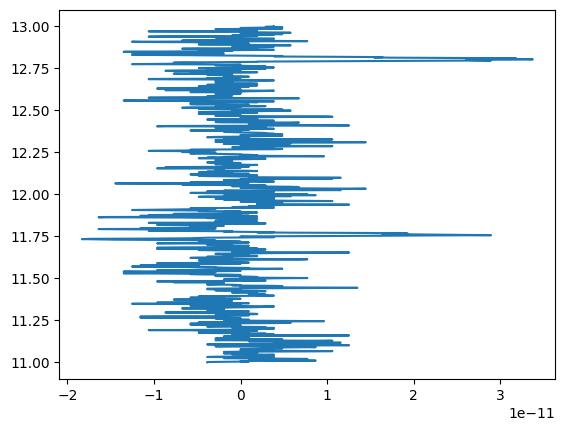

In [21]:
y = raw_selection[1]
x = raw_selection[0].T

plt.plot(x,y)

#### If you just want a numerical matrix of the data you just worked on =

In [24]:
data = raw.get_data()
print(data)
print(data.shape)

[[ 9.64355481e-12  0.00000000e+00  0.00000000e+00 ... -9.64355481e-13
   1.92871096e-12  1.92871096e-12]
 [-4.82177740e-12 -2.89306644e-12 -9.64355481e-13 ... -9.64355481e-13
  -9.64355481e-13 -2.89306644e-12]
 [ 1.01074222e-13  6.31713890e-14  7.58056668e-14 ...  2.14782723e-13
   1.01074222e-13 -5.05371112e-14]
 ...
 [ 3.88542173e-05  4.07510373e-05  4.09957883e-05 ...  7.37312312e-05
   6.10041805e-05  7.28134151e-05]
 [ 6.58391126e-05  6.80025648e-05  6.81779798e-05 ...  9.03387469e-05
   7.67733169e-05  8.72982195e-05]
 [ 2.85661012e-04  2.83699953e-04  2.80431520e-04 ...  2.57552492e-04
   2.54937746e-04  2.49054567e-04]]
(376, 36038)


#### Extracting specific channels from raw data - 

In [27]:
first_channel_data = raw.get_data(picks=0)
eeg_and_eog_data = raw.get_data(picks=["eeg", "eog"])

print(first_channel_data.shape)
print(eeg_and_eog_data.shape)


(1, 36038)
(61, 36038)


In [29]:
## Exporting and saving raw objects - 

data = raw.get_data()
np.save(file="my_data.npy", arr=data)

In [1]:
import mne

# Replace 'data_file.edf' with your actual EEG data file path
raw = mne.io.read_raw_edf('/home/parthshr370/Downloads/EEG/eeg-during-mental-arithmetic-tasks-1.0.0/Subject03_1.edf')


Extracting EDF parameters from /home/parthshr370/Downloads/EEG/eeg-during-mental-arithmetic-tasks-1.0.0/Subject03_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [2]:
raw.describe

<bound method BaseRaw.describe of <RawEDF | Subject03_1.edf, 21 x 91000 (182.0 s), ~21 kB, data not loaded>>

In [3]:
raw.load_data()

Reading 0 ... 90999  =      0.000 ...   181.998 secs...


Measurement date,"January 01, 2010 00:00:00 GMT"
Experimenter,Unknown
Participant,23
Digitized points,Not available
Good channels,21 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.50 Hz
Lowpass,45.00 Hz


In [5]:
raw.describe()

<RawEDF | Subject03_1.edf, 21 x 91000 (182.0 s), ~14.6 MB, data loaded>
ch  name       type  unit        min         Q1     median         Q3        max
 0  EEG Fp1    EEG   µV       -58.53      -7.53       0.17       7.80      77.07
 1  EEG Fp2    EEG   µV       -46.56      -5.81       0.04       5.85      51.02
 2  EEG F3     EEG   µV       -48.38      -7.45      -0.09       7.29      47.03
 3  EEG F4     EEG   µV       -69.73      -7.46      -0.22       7.30      62.06
 4  EEG F7     EEG   µV       -70.38      -5.87      -0.06       5.74      59.93
 5  EEG F8     EEG   µV      -158.05      -5.65      -0.03       5.58     156.37
 6  EEG T3     EEG   µV       -48.30      -7.48      -0.03       7.40      47.98
 7  EEG T4     EEG   µV       -48.46      -6.06      -0.03       6.00      52.26
 8  EEG C3     EEG   µV       -54.89      -7.88       0.00       7.75      56.60
 9  EEG C4     EEG   µV       -48.86      -7.37      -0.05       7.13      48.29
10  EEG T5     EEG   µV       -33.49 

In [6]:
raw.filter(l_freq=1, h_freq=100)  # Adjust frequencies as needed


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Measurement date,"January 01, 2010 00:00:00 GMT"
Experimenter,Unknown
Participant,23
Digitized points,Not available
Good channels,21 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,1.00 Hz
Lowpass,45.00 Hz


In [7]:
# Assuming you have event markers for rest and task periods
events = mne.find_events(raw)

# Define epochs for rest and task conditions based on event IDs
rest_epochs = mne.Epochs(raw, events, event_id={'rest': [1]}, tmin=-1, tmax=2, preload=True)
task_epochs = mne.Epochs(raw, events, event_id={'task': [2]}, tmin=-1, tmax=2, preload=True)


ValueError: No stim channels found. Consider specifying them manually using the 'stim_channel' parameter.

In [8]:
# Calculate PSD for rest and task epochs
psd_rest, f = rest_epochs.compute_psd(fmin=1, fmax=100, n_fft=1024)  # Adjust parameters as needed
psd_task, f = task_epochs.compute_psd(fmin=1, fmax=100, n_fft=1024)


NameError: name 'rest_epochs' is not defined